# Linear Regression
1. import dependencies
2. load and format the data
3. Visualize the data
4. initialize weights
5. Split the data set into Training set, Cross-Validation set, and Test Set
6. Define Cost Function
7. Implement Gradient Descent
8. Train our model
9. Plot Graphs
10. Calculate model accuracy

In [2]:
# Importing Dependencies
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [3]:
# Loading the data into the kernel
data = pd.read_csv('../data1.txt', header = None)

print('Data from CSV file:: \n\n', data.head(5))

# Formatting the data
X = np.array(data.values[:,0])
y = np.array(data.values[:,1])

X = X.reshape((-1,1))
y = y.reshape((-1,1))
m, n = X.shape

X = np.insert(X,0,1,axis = 1)

print('\nX:: \n\n', X[:5, :])
print('\ny:: \n\n', y[:5,:])


Data from CSV file:: 

         0        1
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233

X:: 

 [[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]
 [1.     7.0032]
 [1.     5.8598]]

y:: 

 [[17.592 ]
 [ 9.1302]
 [13.662 ]
 [11.854 ]
 [ 6.8233]]


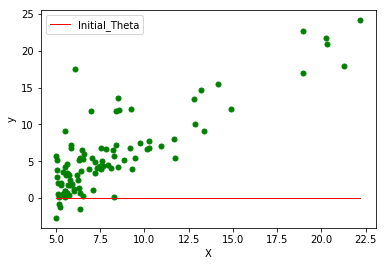

In [4]:
# Randomly initializing weights

Theta = np.zeros(shape = (n+1,1))

# Visualizing our data

plt.scatter(X[:, 1], y, color = 'g', s = 25)
plt.xlabel('X')
plt.ylabel('y')

plt.plot(X[:,1], X@Theta, color='r', linewidth = 1, label = 'Initial_Theta')

plt.legend()
plt.show()


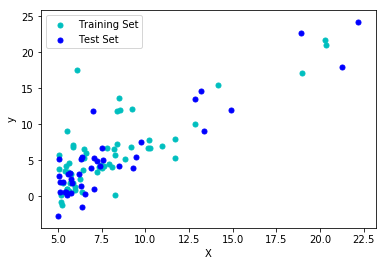

In [5]:
"""
    Splitting the Dataset into 
        Training set
        Test Set
"""

index = np.random.permutation(m)
m_train = round(index.size * 0.6)
m_test = m - m_train

X_train = X[index[:m_train], :]
y_train = y[index[:m_train], :]

X_test = X[index[m_train:], :]
y_test = y[index[m_train:], :]

plt.scatter(X_train[:, 1], y_train,color = 'c', s = 25, label = 'Training Set')
plt.scatter(X_test[:, 1], y_test,color = 'b', s = 25, label = 'Test Set')

plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc='best')

plt.show()

# Cost Function
## Takes in parameters::
    X = (m, n+1) order
    y = (m, 1) order
    Theta = (n+1, 1) order
## Returns::
    Cost = J
    Gradient = (n+1, 1) order

In [6]:

def costFunction(X, y, Theta):
    m = y.size
    h = X@Theta - y
    sqrd_error = h**2
    J = (1/(2*m)) * np.sum(sqrd_error)
    grad = (1/m) * ( X.T @ h )
    return J,grad


In [7]:
def gradientDescent_fixedEpochs(X,y,Theta,costFunc,epochs,learningRate):
    J_hist = np.zeros(shape = (epochs,1))
    Theta_hist = np.zeros(shape = (epochs,2))
    for i in range(epochs):
        J,grad = costFunc(X,y,Theta)
        J_hist[i] = J
        Theta = Theta - learningRate * grad
        Theta_hist[i,0],Theta_hist[i,1] = Theta[0], Theta[1]
    return Theta, J_hist, Theta_hist
        

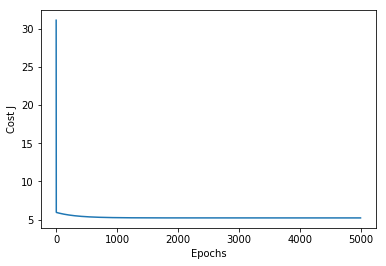

In [8]:
# Randomly initializing weights

Theta = np.zeros((n+1,1))

# Training our model

Theta, J_hist, Theta_hist = gradientDescent_fixedEpochs(X_train,y_train,Theta,costFunction, 5000, 0.01)

plt.plot(np.arange(J_hist.size), J_hist)
plt.xlabel('Epochs')
plt.ylabel('Cost J')

plt.show()

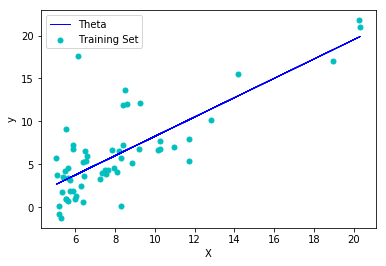

In [9]:
# Visualizing our data

plt.scatter(X_train[:, 1], y_train, color = 'c', s = 25, label = 'Training Set')
plt.xlabel('X')
plt.ylabel('y')

plt.plot(X_train[:,1], X_train@Theta, color='b', linewidth = 1, label = 'Theta')

plt.legend()
plt.show()

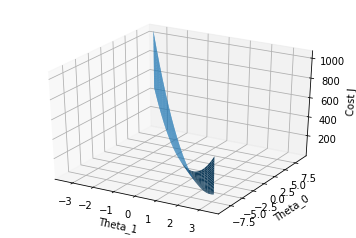

In [10]:


fig = plt.figure()

ax = fig.add_subplot(111, projection = "3d")

Theta_0 = np.linspace(-Theta[0]*3,Theta[0]*3,200)
Theta_1 = np.linspace(-Theta[1]*3,Theta[1]*3,200)

J_vals = np.zeros(shape = (Theta_0.size,Theta_1.size))

for i in range(Theta_0.size):
    for j in range(Theta_1.size):
        t = np.array([[Theta_0[i]],[Theta_1[j]]])
        J_vals[i,j],grad = costFunction(X,y,t)

ax.plot_surface(Theta_1, Theta_0, J_vals, rstride = 10, cstride = 10)
ax.set_xlabel('Theta_1')
ax.set_ylabel('Theta_0')
ax.set_zlabel('Cost J')

plt.show()


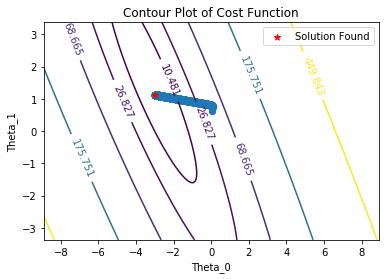

In [11]:
#Contour plot

plt.scatter(Theta_hist[:,0], Theta_hist[:,1],marker = 'o',s = 40)

plt.scatter(Theta[0], Theta[1], marker='*', color='r', s=40, label='Solution Found')

CS = plt.contour(Theta_0, Theta_1, J_vals, np.logspace(-10,10,50))

plt.clabel(CS, inline=1, fontsize=10)
plt.title("Contour Plot of Cost Function")
plt.xlabel("Theta_0")
plt.ylabel("Theta_1")
plt.legend(loc='best')

plt.show()


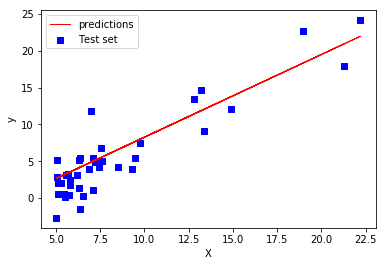

Prediction Error::  3.6397460553666634
variance score::  82.36803877461787
R2 score::  80.15154697053231


In [12]:
from sklearn.metrics import explained_variance_score,r2_score
# Calculating model accuracy on Test set

predictions = X_test @ Theta
plt.scatter(X_test[:,1],y_test,marker = 's',color =  'b', s = 40, label = 'Test set')
plt.plot(X_test[:,1], predictions, linewidth = 1, color = 'r', label = 'predictions')

plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc = 'best')

plt.show()

prediction_error = costFunction(X_test, y_test, Theta)[0]

print('Prediction Error:: ', prediction_error)

print('variance score:: ', explained_variance_score(y_test, predictions)*100)
print('R2 score:: ', r2_score(y_test, predictions)*100)


``@Nikhil_Chigali``